In [24]:
!pip install -q qiskit
!pip install -q qiskit-aer
!pip install -q pylatexenc

In [25]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import random

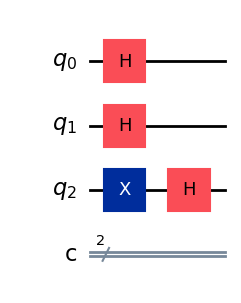

In [26]:
n = 2 #number of zero states initially
qc = QuantumCircuit(n+1,n)
#preparing a state with n-zeros and 1 one bit, then applying Hadamard on them all
for i in range(n):
  qc.h(i)
qc.x(n)
qc.h(n)
qc.draw(output = 'mpl')

Implementing code for a balanced function first

In [27]:
k = 0 #choosing a random qubit among the first n to act as the control qubit
qc.cx(k, n) #here, i am choosing my function f(x) = x_k, which means it outputs the kth qubit of an input state x, which comprises of n qubits
#this is used to implement the |x)|y) ---> |x)|y + x_k), where k is my control qubit, which is randomly selected, and thus will either be 0 or 1 equally

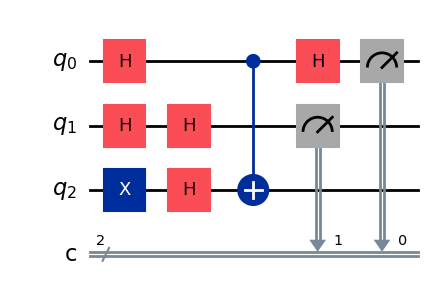

In [28]:
#re-applying Hadamard transformation
for i in range(n):
    qc.h(i)

#measuring the first n qubits
qc.measure(range(n), range(n))
qc.draw(output = 'mpl')

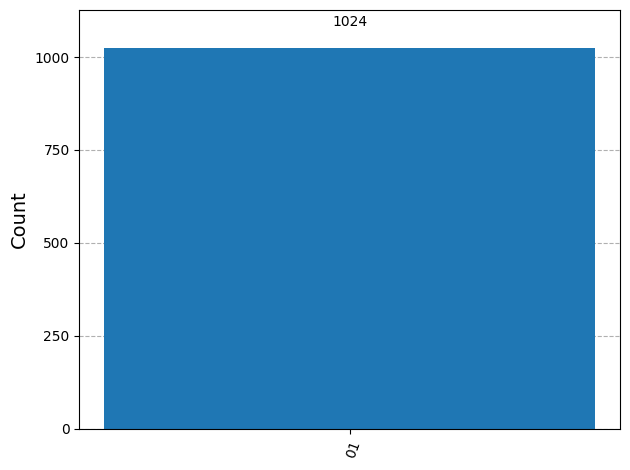

In [30]:
#running the simulation
sim = AerSimulator()
result = sim.run(qc).result()
counts = result.get_counts()

#plotting the result
plot_histogram(counts)

Applying a constant function is much simpler, either f(x) = 0 for all x belonging to {0,1}, in which case the output of U_f of the last qubit would simply be the state of the qubit itself, as |0 + 0) = |0) and |0+1) = |1). If f(x) = 1, we flip the qubit. Let us implement the code for f(x) = 1

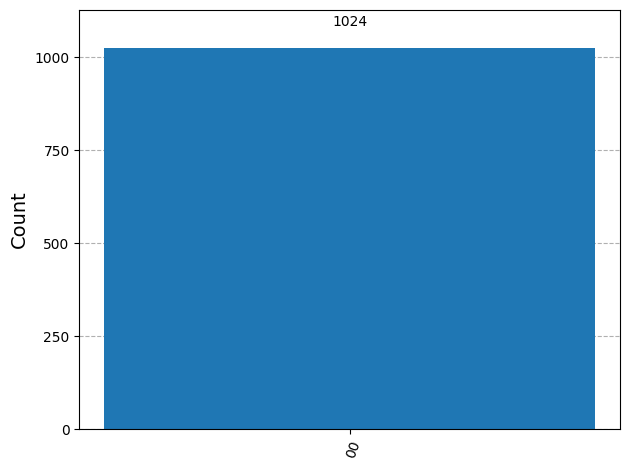

In [31]:
n = 2 #number of zero states initially
qc = QuantumCircuit(n+1,n)
#preparing a state with n-zeros and 1 one bit, then applying Hadamard on them all
for i in range(n):
  qc.h(i)
qc.x(n)
qc.h(n)

qc.x(n) #role of f(x)=1

#re-applying Hadamard transformation
for i in range(n):
    qc.h(i)

#measuring the first n qubits
qc.measure(range(n), range(n))

sim = AerSimulator()
result = sim.run(qc).result()
counts = result.get_counts()

#plotting the result
plot_histogram(counts)